In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 인코더와 디코더가 합쳐진 것
# 인코더는 데이터 압축(차원축소), 디코더는 압축풀기

# 입출력이 모두 x_train => 이미지가 들어가서 동일한 이미지로 출력 
# => 원본이미지의 압축했을때 다시 복원할 수 있을만큼 핵심특징을 가지고 있어야 출력이 가능 
# 데이터 압축용
# pca하듯이 데이터 챠원 축소용
# 핵심 특징 추출용
# 예) 데이터 측정단계에서 인코딩해서 서버에서 받아서 디코더해서 처리 => 부하가 적음

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255

In [7]:
autoencoder = Sequential()

autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu')) # cnn
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) # 14,14
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) # 7,7
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu')) #strides 2칸씩 이동 4,4로됨

autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu')) # 4,4
autoencoder.add(UpSampling2D()) # 8,8   - 온전하게 두배로
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu')) # 8,8
autoencoder.add(UpSampling2D()) # 16,16
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) # 14,14
autoencoder.add(UpSampling2D()) # 28,28
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='relu')) #28,28,1

autoencoder.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 8)          

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test)) 


Epoch 1/50
469/469 [==============================] - 11s 8ms/step - loss: 0.2308 - val_loss: 0.1925
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1853 - val_loss: 0.1722
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1689 - val_loss: 0.1877
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1832 - val_loss: 0.1749
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1652 - val_loss: 0.3555
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1970 - val_loss: 0.1700
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1646 - val_loss: 0.1555
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1543 - val_loss: 0.1884
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1895 - val_loss: 0.2344
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1736 - val_loss: 0.154

In [9]:
random_test = np.random.randint(x_test.shape[0], size=5)
ae_img = autoencoder.predict(x_test)

TypeError: 'builtin_function_or_method' object is not subscriptable

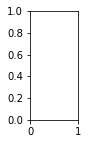

In [18]:
plt.figure(figsize=(7,2))

for i, img_idx in enumerate(random_test):
    ax = plt.subplot(1,7, i+1)
    plt.imshow(x_test[img_idx].reshape[28,28])
    ax.axis('off')
    ax = plt.subplot(2,7, 7+i+1)
    plt.imshow(ae_img[img_idx].reshape(28,28))
    ax.axis('off')
plt

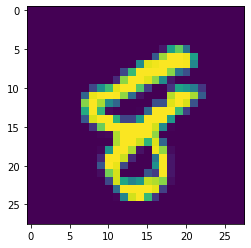

In [12]:
plt.imshow(x_test[1185].reshape(28,28))

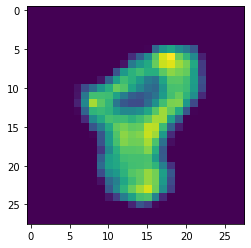

In [17]:
plt.imshow(ae_img[1185].reshape(28,28))

In [11]:
random_test

array([3551, 3631, 7315, 5980, 4448])